<a href="https://colab.research.google.com/github/onticonti/Introduction_scikit-image/blob/master/Scikit_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Run on TensorFlow 2.x
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

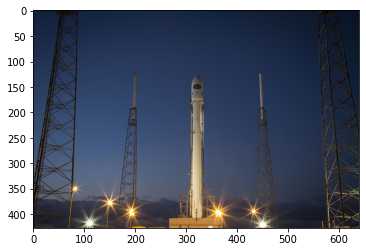

In [ ]:
import matplotlib.pyplot as plt
from skimage import data 
rocket_image = data.rocket()
plt.imshow(rocket_image) 

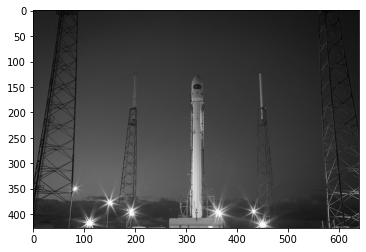

In [ ]:
from skimage import color 
grayscale = color.rgb2gray(rocket_image) 
rgb = color.gray2rgb(grayscale)
plt.imshow(rgb)  

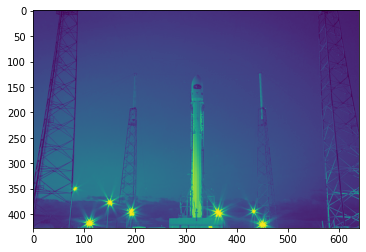

In [ ]:
# Obtaining the red values of the image 
red = rocket_image[:, :, 0] 
# Obtaining the green values of the image 
green = rocket_image[:, :, 1] 
# Obtaining the blue values of the image 
blue = rocket_image[:, :, 2]

plt.imshow(green)

In [ ]:
rocket_image.size

819840

In [ ]:
rocket_image.shape

(427, 640, 3)

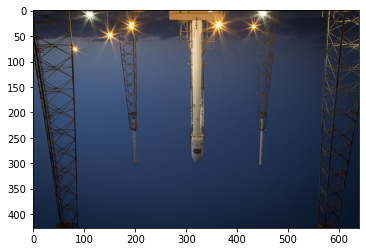

In [ ]:
# Flip the image in up direction
import numpy as np 
vertically_flipped = np.flipud(rocket_image)
plt.imshow(vertically_flipped)

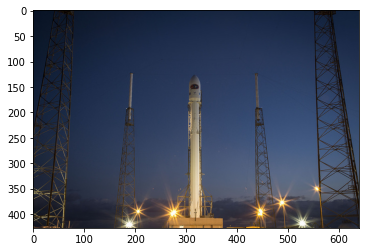

In [ ]:
# Flip the image in left direction 
horizontally_flipped = np.fliplr(rocket_image)
plt.imshow(horizontally_flipped)

(array([ 128.,   59.,   65.,   82.,   92.,  114.,  137.,  185.,  291.,
         595.,  767., 1061., 1037., 1261., 1403., 1475., 1996., 2071.,
        2508., 3241., 3919., 4197., 4689., 4983., 4459., 4593., 4605.,
        4433., 4882., 5308., 5132., 5521., 5100., 4735., 5035., 5106.,
        5223., 5461., 5324., 5365., 5255., 5195., 5506., 5282., 4996.,
        4607., 4769., 4657., 4415., 4229., 3689., 3679., 3540., 3346.,
        3205., 3133., 3041., 2827., 2696., 2526., 2579., 2522., 2380.,
        2188., 2148., 2075., 1916., 1887., 1789., 1902., 1892., 1898.,
        1880., 1855., 1738., 1581., 1616., 1625., 1496., 1447., 1412.,
        1362., 1415., 1383., 1252., 1330., 1418., 1143., 1112., 1269.,
        1146., 1150.,  951.,  845.,  736.,  672.,  613.,  588.,  576.,
         558.,  442.,  369.,  347.,  329.,  296.,  220.,  229.,  223.,
         196.,  198.,  191.,  175.,  187.,  164.,  168.,  155.,  157.,
         145.,  131.,  144.,  118.,  118.,  119.,   97.,  118.,  117.,
      

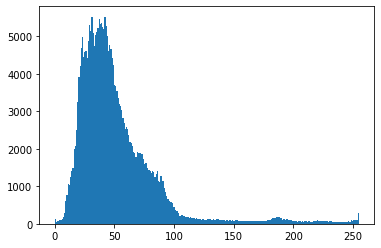

In [ ]:
# Red color of the image 
red = rocket_image[:, :, 0]  
 
# Obtain the red histogram 
plt.hist(red.ravel(),bins=256)

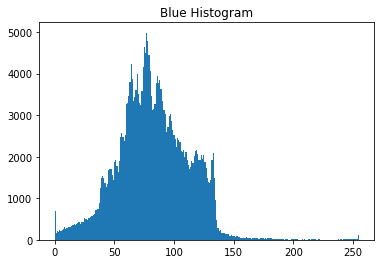

In [ ]:
blue = rocket_image[:, :, 2] 
plt.hist(blue.ravel(), bins=256) 
plt.title('Blue Histogram') 
plt.show() 

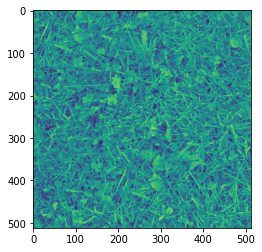

In [ ]:
grass = data.grass()
plt.imshow(grass)

We do so by setting each pixel to:
1.   255 (white) if pixel > thresh value 
2.   0 (black) if pixel < thresh value



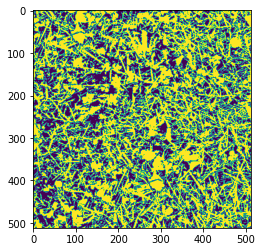

In [ ]:
from skimage.filters import threshold_otsu

# Obtain the optimal threshold value 
thresh  > 127 
 
# Apply thresholding to the image 
binary = data.grass() > thresh

plt.imshow(binary)


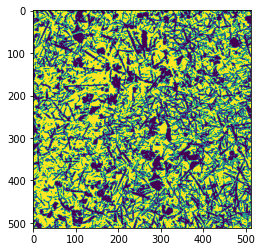

In [ ]:
# Obtain the optimal threshold value 
thresh = 127  
 
# Apply thresholding to the image

inverted_binary = data.grass() <= thresh

plt.imshow(inverted_binary)

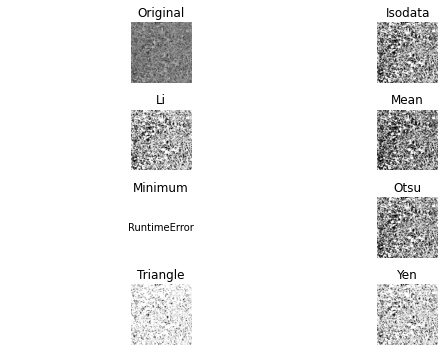

In [ ]:
from skimage.filters import try_all_threshold 
 
 
# Obtain all the resulting images 
fig, ax = try_all_threshold(grass, verbose=False) 
 
 
# Showing resulting plots 
plt.show(fig, ax)

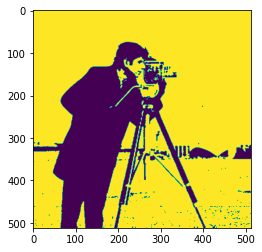

In [ ]:
# Import the otsu threshold function 
from skimage.filters import threshold_otsu 
 
# Obtain the optimal threshold value 
thresh = threshold_otsu(data.camera())  
# Apply thresholding to the image 
binary_global = data.camera() > thresh

plt.imshow(data.camera())
plt.imshow(binary_global)


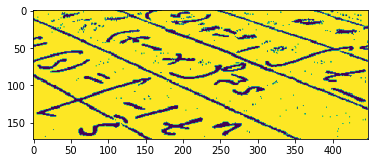

In [ ]:
from skimage.filters import threshold_local 
 
# Set the block size to 35 
block_size = 35  
 
# Obtain the optimal local thresholding 
local_thresh = threshold_local(data.text(), block_size, offset=10) 
 
# Apply local thresholding and obtain the binary image 
binary_local = data.text() > local_thresh

plt.imshow(binary_local)

**Edge detection**


In [ ]:
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

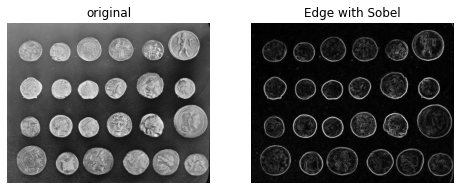

In [ ]:
# Import module and function  
from skimage.filters import sobel 
 
 
# Apply edge detection filter 
edge_sobel = sobel(data.coins()) 
 
 
# Show original and resulting image to compare 
plot_comparison(data.coins(), edge_sobel, "Edge with Sobel")

**Gaussian smoothing**


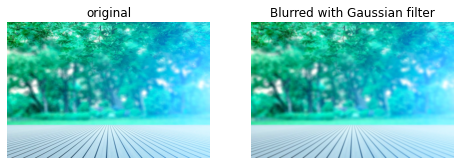

In [ ]:
import cv2
blur = cv2.imread('blur3.jpg')

# Import the module and function 
from skimage.filters import gaussian 
 
 
# Apply edge detection filter 
gaussian_image = gaussian(blur, multichannel=True) 
 
 
# Show original and resulting image to compare 
plot_comparison(blur, gaussian_image, "Blurred with Gaussian filter") 

**Histogram equalization**


/usr/local/lib/python3.6/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


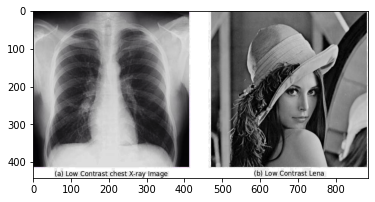

In [ ]:
from skimage import exposure 
heq = cv2.imread("low.jpeg")
 
# "Obtain" the equalized image 
image_eq = exposure.equalize_hist(heq) 
 
 
# Show original and result 
plt.imshow(heq) 
plt.imshow(image_eq)

**CLAHE in scikit-image**

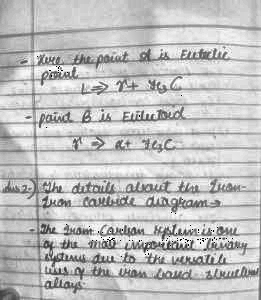

In [ ]:
import cv2 
from google.colab.patches import cv2_imshow
# Reading the image from the present directory 
image = cv2.imread("clah.jpg") 
  
# The initial processing of the image 
# image = cv2.medianBlur(image, 3) 
image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
  
# The declaration of CLAHE  
# clipLimit -> Threshold for contrast limiting 
clahe = cv2.createCLAHE(clipLimit = 5) 
final_img = clahe.apply(image_bw) + 30
cv2_imshow(final_img) 

**Rotating clockwise**


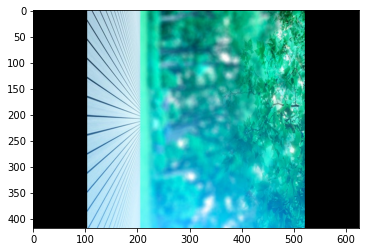

In [ ]:
from skimage.transform import rotate 
 
# Rotate the image 90 degrees clockwise  
image_rotated = rotate(blur, -90)

plt.imshow(image_rotated)
plt.off

**Rotating anticlockwise**

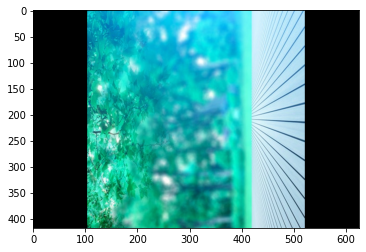

In [ ]:
%matplotlib inline
from skimage.transform import rotate 
from google.colab.patches import cv2_imshow

# Rotate an image 90 degrees anticlockwise 
image_rotated = rotate(blur, 90)

plt.imshow(image_rotated)




**Rescaling**

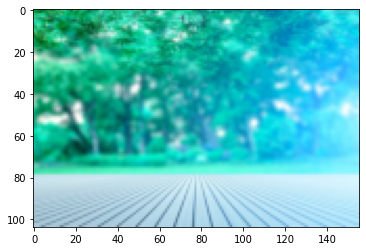

In [ ]:
from skimage.transform import rescale 
 
# Rescale the image to be 4 times smaller  
image_rescaled = rescale(blur, 1/4, anti_aliasing=True, multichannel=True)

plt.imshow(image_rescaled)

**Resizing**

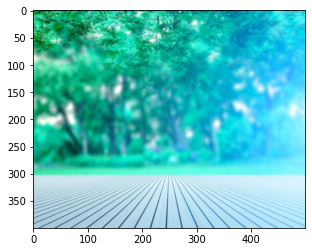

In [ ]:
from skimage.transform import resize 
 
# Height and width to resize height = 400 width = 500  
# Resize image 
image_resized = resize(blur, (400, 500), anti_aliasing=True)

plt.imshow(image_resized)

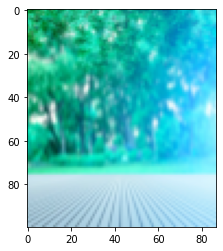

In [ ]:
from skimage.transform import resize 
 
 
# Set proportional height so its 3 times its size 
height = image.shape[0] / 3
width = image.shape[1] / 3 
 
# Resize image 
image_resized = resize(blur, (height, width), anti_aliasing=True)

plt.imshow(image_resized)

**Shapes in scikit-image**


In [ ]:
from skimage import morphology
rectangle = morphology.rectangle(4, 2)
square = morphology.square(4)

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=uint8)

In [ ]:
rectangle

array([[1, 1],
       [1, 1],
       [1, 1],
       [1, 1]], dtype=uint8)

In [ ]:
square

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=uint8)

**Erosion in scikit-image**


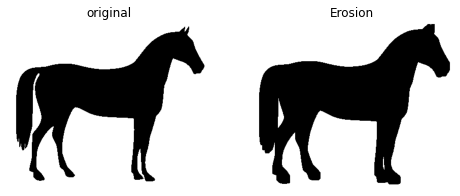

In [ ]:
from skimage import morphology 
 
 
# Set structuring element to the rectangular-shaped 
selem = morphology.rectangle(12,6)  
 
# Obtain the erosed image with binary erosion 
eroded_image = morphology.binary_erosion(data.horse(), selem=selem)
plot_comparison(data.horse(), eroded_image, 'Erosion') 

**Dilation in scikit-image**

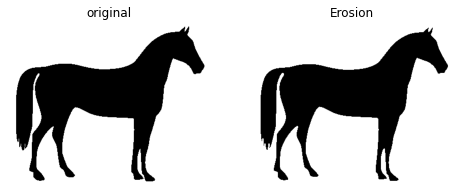

In [ ]:
from skimage import morphology 
 
# Obtain dilated image, using binary dilation 
dilated_image = morphology.binary_dilation(data.horse()) 

 
# See results 
plot_comparison(data.horse(), dilated_image, 'Erosion')

**Image reconstruction in scikit-image**


In [ ]:
def get_mask(image):
   mask = np.zeros(image.shape[:-1]) 

   mask[101:106, 0:240] = 1 
   mask[152:154, 0:60] = 1    
   mask[153:155, 60:100] = 1    
   mask[154:156, 100:120] = 1    
   mask[155:156, 120:140] = 1 
   mask[212:217, 0:150] = 1    
   mask[217:222, 150:256] = 1    
   return mask 

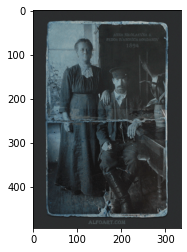

In [ ]:
from skimage.restoration import inpaint
from google.colab.patches import cv2_imshow 
restore = cv2.imread("res.png")
# Obtain the mask 
mask = get_mask(restore) 
 
# Apply inpainting to the damaged image using the mask 
restored_image = inpaint.inpaint_biharmonic(restore,mask,multichannel=True)

plt.imshow(restored_image)

**Apply noise in scikit-image**

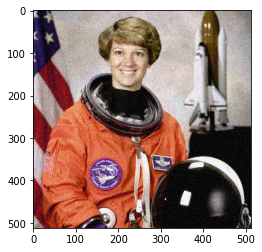

In [ ]:
# Import the module and function 
from skimage.util import random_noise 
 
 
# Add noise to the image 
noisy_image = random_noise(data.astronaut())
plt.imshow(data.astronaut())
plt.imshow(noisy_image)


**Denoising**

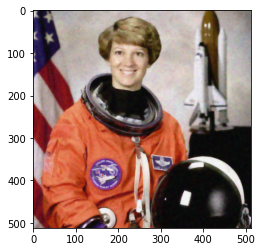

In [ ]:
#Using total variation lter denoising
from skimage.restoration import denoise_tv_chambolle 
 
 
# Apply total variation filter denoising 
denoised_image = denoise_tv_chambolle(noisy_image,weight=0.1,multichannel=True)

plt.imshow(denoised_image)

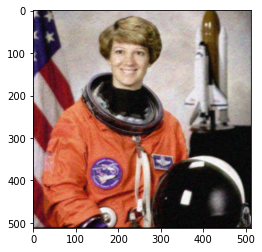

In [ ]:
#Bilateral lter

from skimage.restoration import denoise_bilateral 
 
 
# Apply bilateral filter denoising 
denoised_image = denoise_bilateral(noisy_image, multichannel=True)

plt.imshow(denoised_image)

**Superpixels & segmentation**


Segmentation

1.   Supervised
2.   Unsupervised



**Unsupervised segmentation (SLIC)**

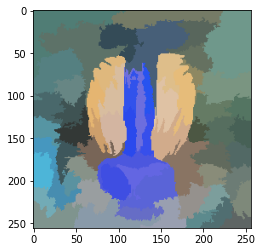

In [ ]:
# Import the modules
babo = cv2.imread("baboon.jpg") 
from skimage.segmentation import slic 
from skimage.color import label2rgb  
# Obtain the segments 
segments = slic(babo) 
 
# Put segments on top of original image to compare 
segmented_image = label2rgb(segments, babo, kind='avg')

plt.imshow(segmented_image)

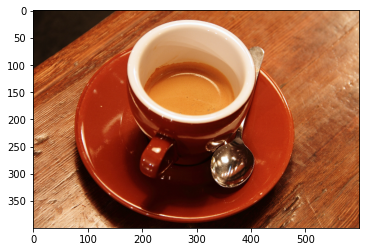

In [ ]:
plt.imshow(data.coffee())

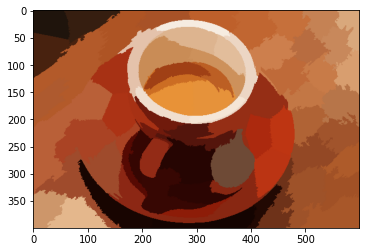

In [ ]:
from skimage.segmentation import slic 
from skimage.color import label2rgb  
# Obtain the segments 
segments = slic(data.coffee()) 
 
# Put segments on top of original image to compare 
segmented_image = label2rgb(segments,data.coffee(), kind='avg')

plt.imshow(segmented_image)

**Find contours using scikit-image**

In [ ]:
# read the image
image = cv2.imread("hand.jpg")
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# create a binary thresholded image
_, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)

In [ ]:
#Transform the image to 2D grayscale.
# Make the image grayscale 
image = color.rgb2gray(image)

#Binarize the image
# Obtain the thresh value 
thresh = threshold_otsu(image) 
# Apply thresholding 
thresholded_image = image > thresh 


**Finding the edges with Canny**

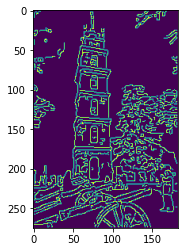

In [ ]:
from skimage.feature import canny 
 
 
# Convert image to grayscale 
topha = cv2.imread("tophane.jpg")
top = color.rgb2gray(topha) 
 
 
# Apply Canny detector 

canny_edges = canny(top) 

plt.imshow(canny_edges)

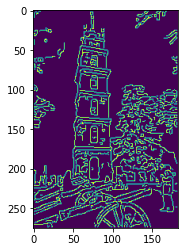

In [ ]:
canny_edges_0_5 = canny(top, sigma=0.5)
plt.imshow(canny_edges)

**Corner detection**

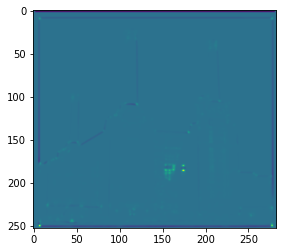

In [ ]:
#Harris corner detector
image = cv2.imread("cam.jpg")
from skimage.color import rgb2gray
from skimage.feature import corner_harris,corner_peaks
 
# Convert image to grayscale
image = rgb2gray(image)   
# Apply the Harris corner detector on the image 
measure_image = corner_harris(image)

plt.imshow(measure_image)

In [ ]:
coords = corner_peaks(corner_harris(image), min_distance=5) 
 
 
print("A total of", len(coords), "corners were detected.")

A total of 14 corners were detected.


In [ ]:
def show_image_with_corners(image, coords, title="Corners detected"):
       
  plt.imshow(image, interpolation='nearest', cmap='gray')     
  plt.title(title)     
  plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15)     
  plt.axis('off')     
  plt.show() 

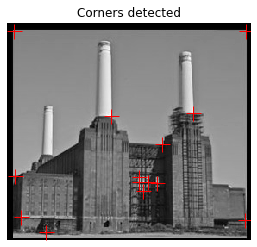

In [ ]:
show_image_with_corners(image, coords)

**Face detection**

Face detection use cases



*    Filters 
*    Auto focus 
*    Recommendations 
*    Blur for privacy protection 
*    To recognize emotions later on
*    List item





**Detecting faces with scikit-image**

In [6]:
import numpy as np
import cv2

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

img = cv2.imread('insanlar.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

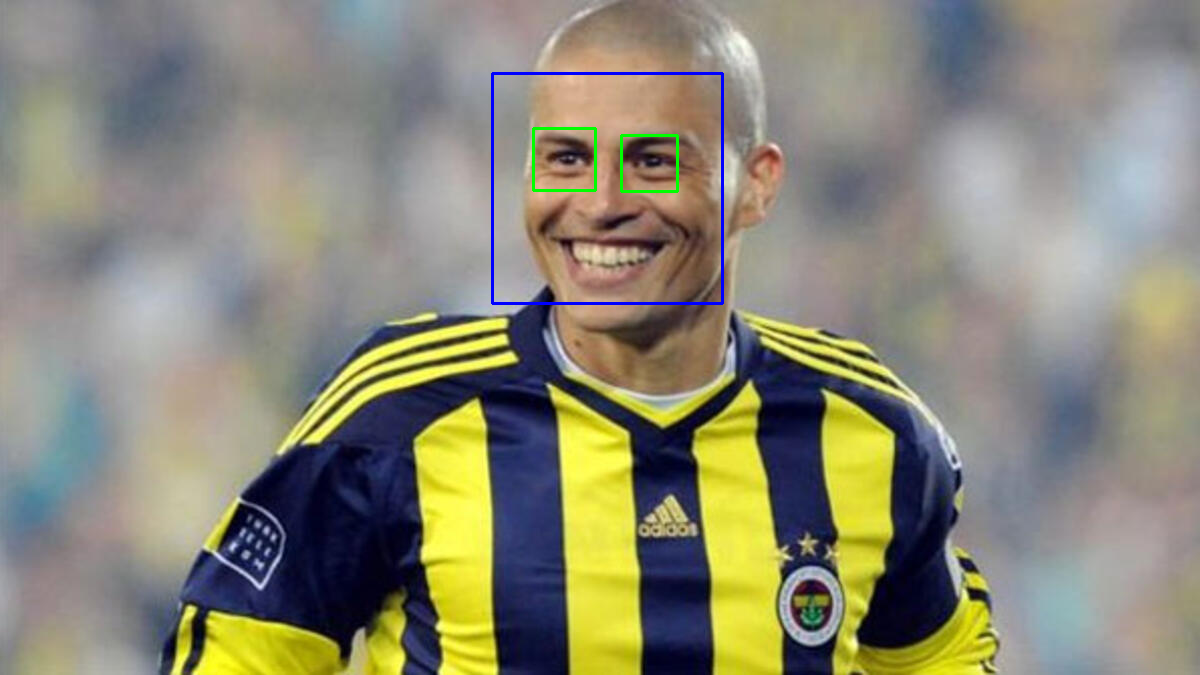

In [7]:
from google.colab.patches import cv2_imshow
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()